<img src="https://raw.githubusercontent.com/rhatiro/Credit-score/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Projeto Semantix**

**Aluno:** [Igor Coelho Barbosa](https://www.linkedin.com/in/igor-coelho-barbosa/)<br>
**Data de entrega:** 10 de março de 2024.<br>
**Última atualização:** 10 de março de 2024.

---

# <div style="text-align:center"> Regressão Logística Multinomial - Análise de pontuação de crédito </div>

## Índice <a name="Contents"></a>

- [Etapa 1 CRISP - DM: Entendimento do negócio](#1)
- [Etapa 2 & 3 Crisp-DM: Entendimento e preparação dos dados](#2e3)
    > - [Import das bibliotecas/pacotes](#import)
    > - [Leitura e pré-processamento dos dados](#leitura)
    > - [Preparação dos dados - Tratamento de nulos](#tratamento_nulos)
    > - [Preparação dos dados - Seleção de variáveis](#selecao_variaveis)
    > - [Preparação dos dados - Conversão de variáveis](#conversao)
    > - [Entendimento dos dados - Analise Univarida - Numérica](#analise_numérica)   
    > - [Entendimento dos dados - Analise Univarida - Categórica](#variavel_categórica)
- [Etapa 4 e 5 Crisp-DM: Modelagem & Avaliação dos resultados](#4e5)
    > - [Divisão entre treino e teste](#divisao)
    > - [Normalização e criação de dummies](#normalização_e_dummies)
    > - [Treinamento - PCA](#PCA)
    >> - [Matriz confusão - PCA](#matriz_PCA)
    > - [Treinamento - Seleção](#selecao)
    >> - [Matriz confusão - Seleção](#matriz_selecao)
    > - [Tunning de hiperparâmetros](#tunning)
    >> - [Matriz confusão - Após Tunning](#matriz_tunning)
    > - [Avaliação de resultados](#avaliacao)
- [Etapa 6 Crisp-DM: Implantação](#implantacao)

---

## Etapa 1 CRISP - DM: Entendimento do negócio <a name="1"></a>

**Este é um problema de classificação de pontuação de crédito**, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/datasets/parisrohan/credit-score-classification).  
  
Essa é uma base de proponentes de cartão de crédito. **O objetivo é construir um modelo preditivo para identificar qual perfil de crédito o usuário corresponde** ("Poor","Average" ou "Good") através de variáveis presentes na base de dados do Kaggle. Para isso, será desenvolvido um modelo de Regressão Logística Multinomial. Este modelo é uma extensão da regressão logística binomial para o caso de múltiplas classes. Ele é utilizado quando a variável dependente é categórica com três ou mais categorias exclusivas e não ordenadas.


<div style="text-align: right"
     
[Voltar ao índice](#Contents)

---

## Etapa 2 & 3 Crisp-DM: Entendimento e preparação dos dados <a name="2e3"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### Dicionário de dados

| Nome da variável            | Descrição                                        | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| ID | Representa um valor de registro único |texto|
| Customer_ID| Representa um valor de cliente único | texto|
| Month| Mês do ano por extenso - Ex: October |texto|
| Name| Nome do cliente |texto|
| Age | Idade do cliente | inteiro |
| SSN| Número de segurança do cliente |texto|
| Occupation | Profissão do cliente | texto |
| Annual_Income | Receita anual do cliente | float |
| Monthly_Inhand_Salary | Salário mensal do cliente |float|
| Num_Bank_Accounts | Quantidades de contas do cliente |inteiro|
| Num_Credit_Card | Quantidades de cartões de crédito do cliente |inteiro|
| Interest_Rate | Representa a taxa de juros no cartão de crédito |float|
| Num_of_Loan | Representa o número de empréstimos obtidos no banco |inteiro|
| Type_of_Loan | Representa os tipos de empréstimos obtidos por uma pessoa |texto|
| Delay_from_due_date| Representa o número médio de dias de atraso em relação à data de pagamento |inteiro|
| Num_of_Delayed_Payment| Representa o número médio de pagamentos atrasados por uma pessoa |inteiro|
| Changed_Credit_Limit| RRepresenta a mudança percentual no limite do cartão de crédito. |float|
| Num_Credit_Inquiries| Representa o número de consultas ao cartão de crédito. |inteiro|
| Credit_Mix| Representa a classificação da composição de créditos |texto|
| Outstanding_Debt| Representa a dívida restante a ser paga (em dólares americanos) |float|
| Credit_Utilization_Ratio| Representa a taxa de utilização do cartão de crédito |float|
| Credit_History_Age| Representa a idade do histórico de crédito da pessoa |texto|
| Payment_of_Min_Amount| Representa se apenas o valor mínimo foi pago pela pessoa |bool|
| Total_EMI_per_month| Representa os pagamentos mensais de EMI (em dólares americanos) |float|
| Amount_invested_monthly| Representa o valor mensal investido pelo cliente (em dólares americanos) |float|
| Payment_Behaviour| Representa o comportamento de pagamento do cliente (em dólares americanos) |texto|
| Monthly_Balance| Representa o saldo mensal do cliente (em dólares americanos) |float|
| **Credit_Score** | Representa a faixa de pontuação de crédito (Pobre, Padrão, Bom) - variável alvo |texto|





### Import das bibliotecas/pacotes <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score



%matplotlib inline

### Leitura e pré-processamento dos dados <a name="leitura"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

OBSERVAÇÃO: Os dados de teste não possuem a viriável alvo, ele sera utilizado apenas para simular uma aplicação real
após o deploy do projeto, todo o projeto será treinado utilizando a base "df_train"disponibilizada pelo Kaggle.

In [44]:
df_train = pd.read_csv("train.csv")

print(df_train.shape)
df_train.head()

(100000, 28)


<ipython-input-44-99756dbab4ac>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Tratamento de valores nulos <a name="tratamento_nulos"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [45]:
df = df_train

df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [46]:
df= df.dropna()
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### Entendimento dos dados  <a name="univariada"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [47]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000,53049.000000
mean,4024.502617,16.842806,22.787253,76.272352,21.994119,27.062866,32.219031,1445.924761
std,3094.967739,115.605025,129.339640,479.226709,15.220406,187.185825,5.057398,8407.429893
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.881250,4.462837
25%,1575.345833,4.000000,4.000000,8.000000,10.000000,3.000000,28.046338,41.244418
50%,2991.016667,6.000000,6.000000,15.000000,19.000000,6.000000,32.251786,78.418272
75%,5712.553333,8.000000,7.000000,22.000000,29.000000,9.000000,36.408991,169.286269
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2594.000000,49.564519,82331.000000


In [48]:
df.dtypes


ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

É possível ver que algumas variáveis estão com o seu tipo errado, esse problema precisa ser corrigido antes
do treinamento do modelo.

### Seleção inicial de variáveis  <a name="selecao_variaveis"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

Algumas variáveis como o "id" do cliente não fazem sentido para o modelo, portanto irei manter apenas varáveis
que considerei fazer mais sentido.

In [49]:
df = df[["Age","Occupation","Annual_Income","Monthly_Inhand_Salary","Num_Bank_Accounts","Num_Credit_Card","Interest_Rate","Num_of_Loan","Delay_from_due_date","Num_of_Delayed_Payment","Changed_Credit_Limit","Num_Credit_Inquiries","Credit_Mix","Outstanding_Debt","Credit_Utilization_Ratio","Payment_of_Min_Amount",
"Total_EMI_per_month","Amount_invested_monthly", "Payment_Behaviour","Monthly_Balance","Credit_Score" ]]

df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,23,Scientist,19114.12,1824.843333,3,4,3,4,3,8_,...,4.0,Good,809.98,22.537593,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,28_,_______,34847.84,3037.986667,2,4,6,1,3,4,...,2.0,Good,605.03,24.464031,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,3037.986667,2,4,6,1,7,1,...,2.0,Good,605.03,38.550848,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84_,3037.986667,2,1385,6,1,3,-1,...,2.0,_,605.03,33.224951,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,6,...,3.0,_,502.38,39.323569,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7,...,3.0,_,502.38,34.663572,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7,...,3.0,_,502.38,40.565631,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6,...,3.0,Good,502.38,41.255522,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


Temos algumas linhas com valores inapropriados como na coluna ocupation alguns valores estão sem preenchimento adequado,
na célula abaxo fiz o tratamento de todas as inconsistências que encontrei nesse dataframe.

In [50]:
df = df[df.Amount_invested_monthly != "__10000__"]

df['Age'] = df['Age'].str.replace('_','')

df['Annual_Income'] = df['Annual_Income'].str.replace('_','')

df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_','')

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_','')

df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_','')

df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_','')

df = df[df.Changed_Credit_Limit != '']

df = df[df.Monthly_Balance != '__-333333333333333333333333333__']

df = df[df.Occupation != '_______']

df = df[df.Credit_Mix != '_']

df = df[df.Payment_Behaviour != '!@9#%8']



df.shape

<ipython-input-50-9a7bc34fa8c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].str.replace('_','')
<ipython-input-50-9a7bc34fa8c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annual_Income'] = df['Annual_Income'].str.replace('_','')
<ipython-input-50-9a7bc34fa8c0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

(34099, 21)

Após a limpeza dos dados saímos de 53049 linhas para 34099, continua sendo uma boa quantidade de regitros para
treinarmos o nosso modelo.

### Conversão de variáveis para o tipo correto  <a name="conversao"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

Criei um dicionário para esfecificar qual tipo cada coluna do meu dataframe deve ser, após isso
"printei" os novos tipos das minhas colunas.

In [51]:
#Criação do dicionário
convert_dict = {"Age" : int,
"Occupation" : object,
"Annual_Income" : float ,
"Monthly_Inhand_Salary" : float,
"Num_Bank_Accounts" : int,
"Num_Credit_Card" : int,
"Interest_Rate" : int,
"Num_of_Loan" : int,
"Delay_from_due_date": int,
"Num_of_Delayed_Payment" : int,
"Changed_Credit_Limit" : float,
"Num_Credit_Inquiries" : int,
"Credit_Mix" : object,
"Outstanding_Debt" : float,
"Credit_Utilization_Ratio" : float,
"Payment_of_Min_Amount" : bool,
"Total_EMI_per_month" : float,
"Amount_invested_monthly" : float,
 "Payment_Behaviour" : object,
 "Monthly_Balance" : float,
 "Credit_Score" : object
                }

df = df.astype(convert_dict)
print(df.dtypes)

Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount          bool
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object


In [52]:
df.describe()


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,34099.000000,3.409900e+04,34099.000000,34099.000000,34099.000000,34099.000000,34099.000000,34099.000000,34099.000000,34099.000000,34099.00000,34099.000000,34099.000000,34099.000000,34099.000000,34099.000000
mean,111.163758,1.792156e+05,4037.421371,17.115839,22.415027,77.450922,3.347518,21.952990,32.476055,10.776903,27.04704,1506.076954,32.199745,1407.962050,182.199003,383.115464
std,693.376711,1.460850e+06,3104.236608,118.550728,127.347559,484.085903,62.210080,15.222844,232.847952,6.931620,187.26242,1191.867290,5.055798,8246.885032,177.445632,195.572501
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.440000,0.00000,0.230000,20.881250,4.462837,0.000000,0.453456
25%,24.000000,1.884636e+04,1575.345833,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.605000,3.00000,600.730000,28.030641,41.164303,69.371971,264.662237
50%,33.000000,3.615422e+04,2995.195000,6.000000,6.000000,15.000000,3.000000,19.000000,14.000000,9.710000,6.00000,1234.910000,32.227404,78.447235,123.872796,325.543370
75%,42.000000,7.019418e+04,5759.096250,8.000000,7.000000,22.000000,6.000000,29.000000,19.000000,15.520000,9.00000,2129.155000,36.389111,169.481984,225.273343,445.776353
max,8682.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1480.000000,67.000000,4397.000000,36.290000,2594.00000,4998.070000,49.564519,82331.000000,1594.499454,1552.946094


Pelo describe, é possível ver que há valores que não fazem sentido como a coluna de idade "Age" com valores negativos.

Tratamento realizado na célula abaixo

In [53]:
#Mantendo apenas valores positivos


df = df[df.Age > 0]
df = df[df.Age < 90]
df = df[df.Num_Bank_Accounts >= 0]
df = df[df.Num_of_Loan >= 0]
df = df[df.Changed_Credit_Limit >= 0]
df = df[df.Delay_from_due_date >= 0]
df = df[df.Num_of_Delayed_Payment >= 0]

df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,31084.000000,3.108400e+04,31084.000000,31084.000000,31084.000000,31084.000000,31084.000000,31084.000000,31084.000000,31084.000000,31084.000000,31084.000000,31084.000000,31084.000000,31084.000000,31084.000000
mean,32.879842,1.783499e+05,4003.952119,17.032396,22.479507,78.115011,7.555849,22.212296,32.558036,11.024326,27.304562,1522.116491,32.198299,1420.398386,180.989846,381.090545
std,10.668979,1.466080e+06,3076.718617,118.036752,127.362056,487.384598,59.758962,15.170549,231.686076,6.805019,188.010346,1198.513696,5.054552,8270.335721,176.183690,193.379835
min,14.000000,7.005930e+03,303.645417,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.881250,4.462837,0.000000,0.453456
25%,24.000000,1.876910e+04,1569.612083,4.000000,4.000000,8.000000,2.000000,11.000000,9.000000,5.897500,3.000000,609.770000,28.043382,41.334303,68.989462,264.365639
50%,33.000000,3.592205e+04,2974.400000,6.000000,6.000000,15.000000,4.000000,19.000000,15.000000,9.880000,6.000000,1251.990000,32.225079,78.374187,123.012772,324.779353
75%,41.000000,6.974096e+04,5704.384583,8.000000,7.000000,22.000000,6.000000,29.000000,19.000000,15.662500,9.000000,2158.210000,36.389912,169.362192,223.376861,443.423216
max,56.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1480.000000,67.000000,4397.000000,36.290000,2594.000000,4998.070000,49.564519,82331.000000,1594.499454,1552.946094


In [54]:
df.shape

(31084, 21)

Os dados saíram de 34099 linhas para 31084 linhas, continua sendo uma boa quantidade de regitros para treinarmos o nosso modelo.

### Entendimento dos dados - Análise univariável - Variáveis numéricas <a name="analise_numérica"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

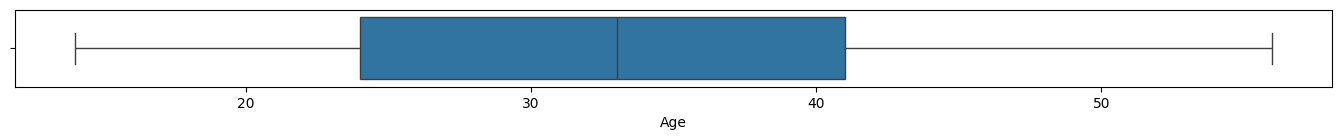

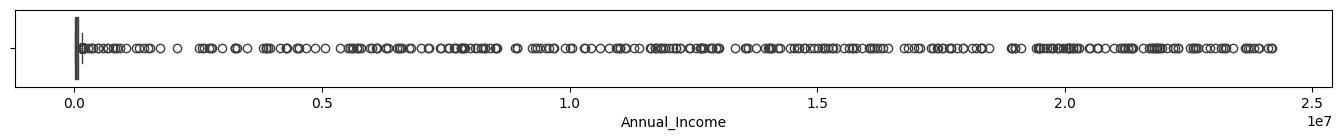

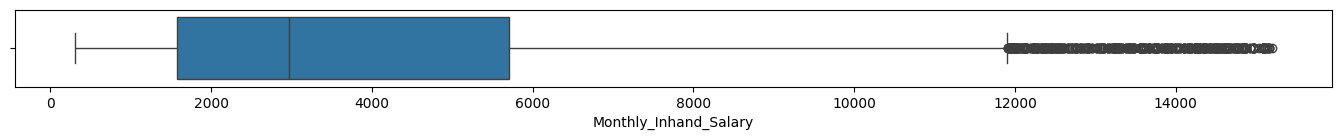

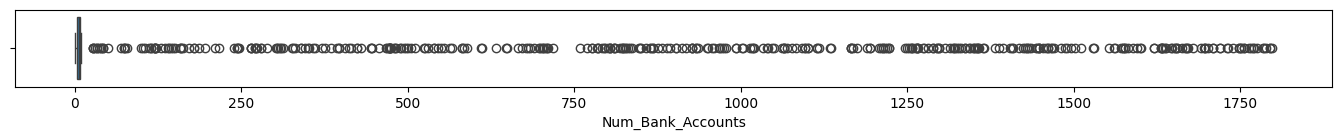

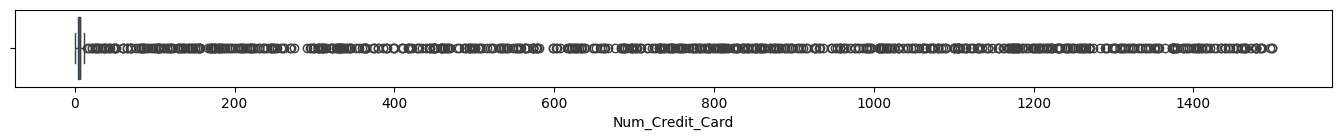

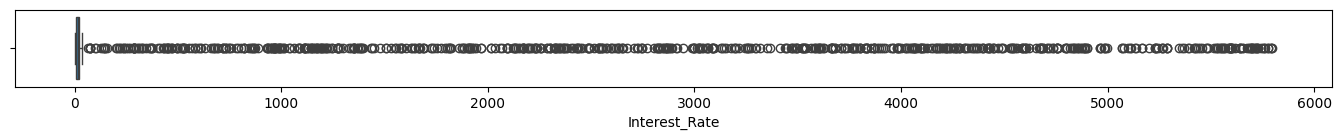

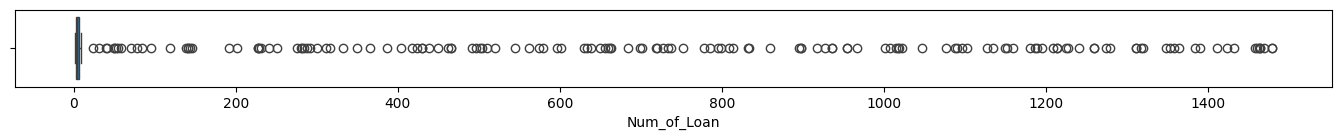

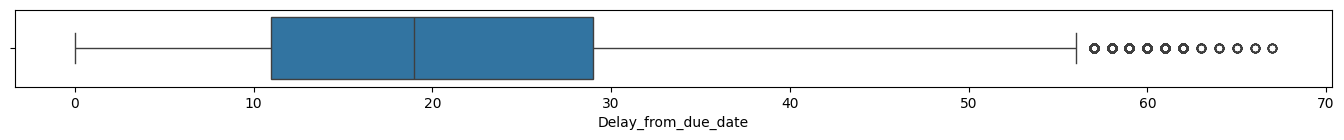

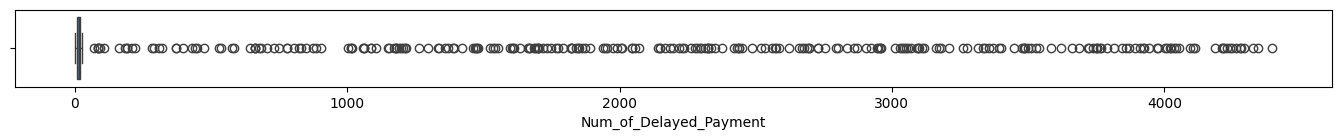

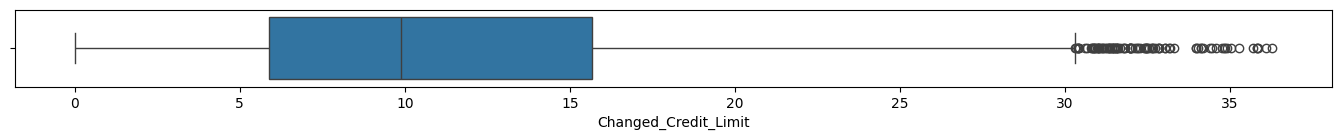

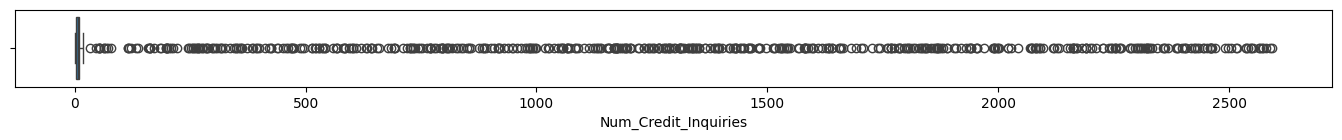

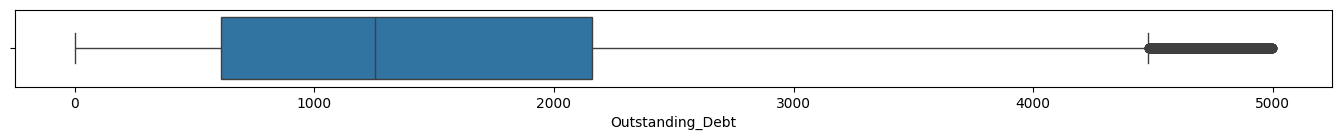

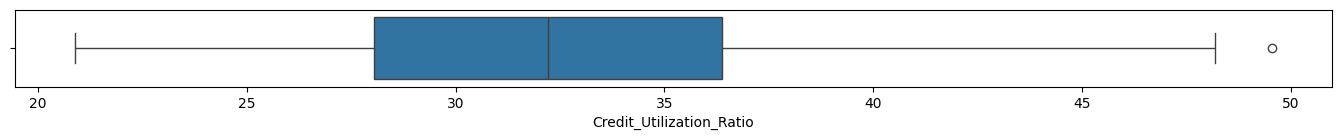

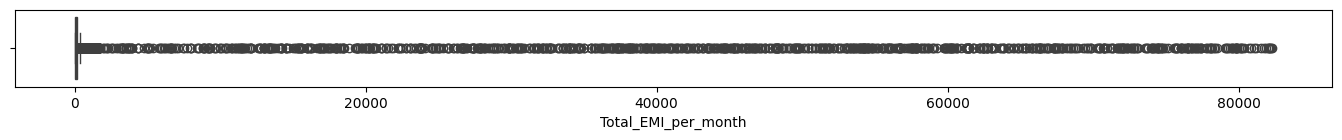

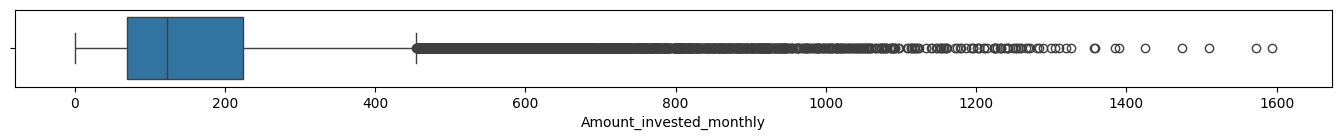

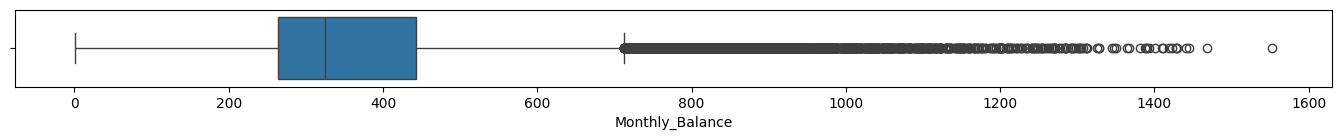

In [55]:
df_numerico=df.select_dtypes(exclude=['object'])
df_numerico=df_numerico.select_dtypes(exclude=['bool'])

for column in df_numerico:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_numerico, x=column)

Avaliando os box plots gerados, é possível perceber que algumas variáveis não estão bem distribuidas, o que pode influenciar
no treinamento do nosso modelo.

### Entendimento dos dados - Análise univariável - Variáveis categóricas <a name="variavel_categórica"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

<Axes: >

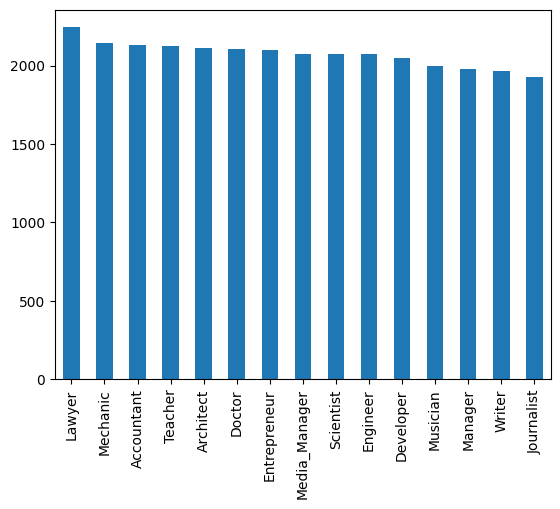

In [56]:
df['Occupation'].value_counts().plot(kind='bar')

<Axes: >

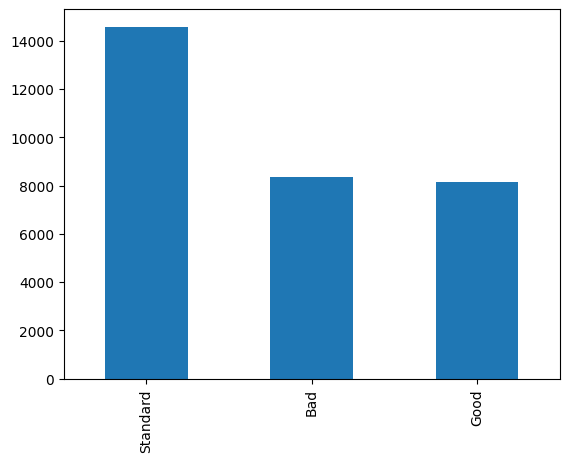

In [57]:
df['Credit_Mix'].value_counts().plot(kind='bar')

<Axes: >

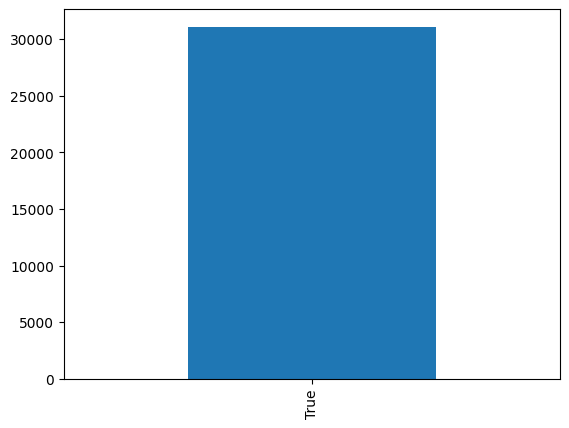

In [58]:
df['Payment_of_Min_Amount'].value_counts().plot(kind='bar')

Como todos os dados restantes possuem a coluna 'Payment_of_Min_Amount' = true, ela será retirada do modelo

<Axes: >

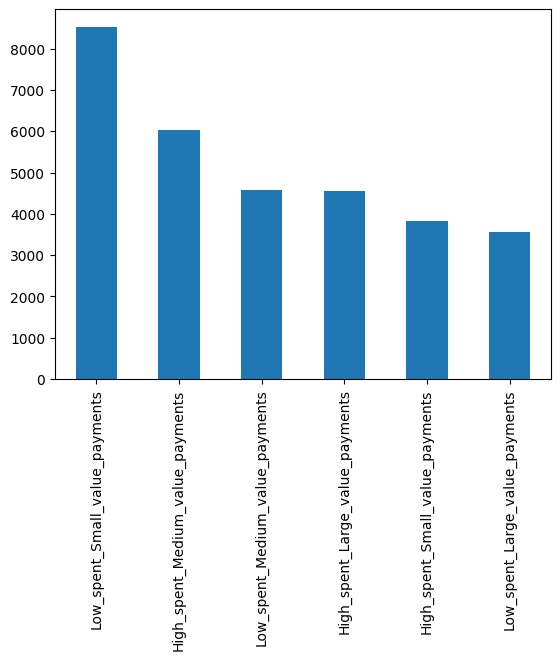

In [59]:
df['Payment_Behaviour'].value_counts().plot(kind='bar')

<Axes: >

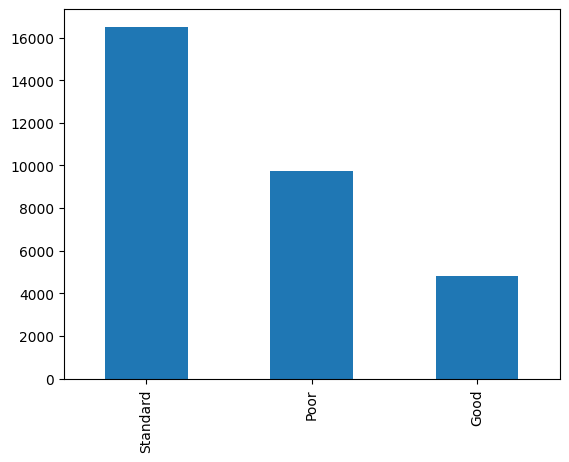

In [60]:
df['Credit_Score'].value_counts().plot(kind='bar')

In [61]:
#Dataframe com index resetado

df.reset_index(drop=True, inplace=True)
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,8,...,4,Good,809.98,22.537593,True,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
1,28,Teacher,34847.84,3037.986667,2,4,6,1,7,1,...,2,Good,605.03,38.550848,True,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
2,28,Teacher,34847.84,3037.986667,2,4,6,1,3,1,...,2,Good,605.03,34.977895,True,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
3,28,Teacher,34847.84,3037.986667,2,4,6,1,3,0,...,2,Good,605.03,33.381010,True,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
4,28,Teacher,34847.84,3037.986667,2,4,6,1,3,4,...,2,Good,605.03,32.933856,True,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31079,50,Writer,37188.10,3097.008333,1,4,5,3,5,12,...,3,Good,620.64,37.753013,True,84.205949,147.339908,Low_spent_Small_value_payments,368.154976,Good
31080,28,Architect,20002.88,1929.906667,10,8,29,5,35,26,...,9,Bad,3571.70,22.895966,True,60.964772,43.370670,High_spent_Large_value_payments,328.655224,Poor
31081,28,Architect,20002.88,1929.906667,10,8,29,5,33,25,...,9,Bad,3571.70,39.772607,True,12112.000000,148.275233,Low_spent_Small_value_payments,273.750662,Poor
31082,29,Architect,20002.88,1929.906667,10,8,29,5,33,25,...,9,Bad,3571.70,37.140784,True,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard


## Etapa 4 e 5 Crisp-DM: Modelagem & Avaliação dos resultados<a name="4e5"></a>


Uso do streamlit para analisar novos dados seria uma ótima opção de deploy, como esse é apenas um projeto simplificado e teórico, deixarei aqui apenas um exemplo de uma página do streamlit construida por mim. Caso queira, visite meu github, lá é possível ver alguns projetos com deploy utilizando o streamlit.

Muito obrigado a todos pela atenção! Qualquer dúvida ou sugestão, pode me contactar pelo Linkedin.

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### Treinamento do modelo - Divisão entre treino e teste <a name="divisao"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [62]:
# Divisão inicial em treinamento (80%) e teste (20%)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Reservar o índice após a divisão da base
df_train.reset_index(drop=True, inplace=True)

df_test.reset_index(drop=True, inplace=True)

In [63]:
# Separando as features e a variável alvo para cada conjunto

X_train, y_train = df_train.drop(columns=['Credit_Score']), df_train['Credit_Score']

X_test, y_test = df_test.drop(columns=['Credit_Score']), df_test['Credit_Score']

#### Visualização da base de X_train, apenas variáveis explicativas

In [64]:
X_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,33,Accountant,8489.190,908.432500,6,10,20,6,23,19,30.25,13,Bad,3358.60,36.426014,True,26.426856,54.310235,Low_spent_Small_value_payments,300.106159
1,30,Manager,13590.595,1294.549583,8,5,9,3,8,12,10.79,2,Good,170.99,34.841733,True,18.168134,42.959407,High_spent_Small_value_payments,328.327418
2,27,Engineer,130210.200,10971.850000,7,4,5,1,18,12,18.32,4,Standard,61.98,32.523294,True,68.896136,429.513147,High_spent_Small_value_payments,858.775717
3,50,Musician,21761.490,1615.457500,5,4,4,3,8,11,8.77,2,Standard,830.29,32.485175,True,38.785619,124.270703,Low_spent_Medium_value_payments,278.489428
4,21,Entrepreneur,89864.280,7538.690000,5,5,1,3,15,7,2.12,2,Good,620.76,28.406414,True,173.044420,772.244946,Low_spent_Medium_value_payments,88.579634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24862,23,Mechanic,42527.040,3374.920000,8,6,22,7,17,18,18.90,10,Bad,4193.78,31.629981,True,230.268934,135.082757,High_spent_Medium_value_payments,222.140310
24863,50,Entrepreneur,15749.970,1474.497500,0,3,2,3,3,6,2.34,2,Good,750.94,31.904861,True,36.184589,85.682899,High_spent_Small_value_payments,285.582263
24864,43,Engineer,17448.080,1315.006667,9,5,20,9,39,18,2.50,12,Bad,2575.23,29.394675,True,94.854868,68.026845,Low_spent_Medium_value_payments,248.618953
24865,42,Mechanic,32827.250,2828.604167,6,6,5,3,18,9,13.82,7,Standard,1271.28,22.731376,True,49.535082,247.798025,Low_spent_Small_value_payments,275.527309


#### Visualização da base de Y_train, apenas a variável alvo

In [65]:
y_train

0        Standard
1            Good
2        Standard
3        Standard
4            Good
           ...   
24862        Poor
24863        Good
24864    Standard
24865    Standard
24866        Poor
Name: Credit_Score, Length: 24867, dtype: object

### Treinamento do modelo - Normalização e criação de "dummies" <a name="normalização_e_dummies"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [66]:
# Normalização das variáveis numéricas - treino
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Criação de variáveis dummy para as variáveis categóricas - treino
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

In [67]:
# Normalização das variáveis numéricas - teste
numeric_cols = X_test.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X_test[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])

# Criação de variáveis dummy para as variáveis categóricas - teste
categorical_cols = X_test.select_dtypes(include=['object']).columns.tolist()
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

#### Visualização da base de X_train, apenas normalização e criação de "dummies"

In [68]:
X_train

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,0.014037,-0.114608,-1.006746,-0.093519,-0.096358,-0.119720,-0.029925,0.047863,-0.057586,2.818369,...,0,0,0,0,0,0,0,0,0,1
1,-0.266707,-0.110977,-0.881127,-0.076605,-0.136195,-0.142294,-0.077947,-0.937571,-0.088009,-0.034563,...,0,0,0,1,0,0,1,0,0,0
2,-0.547450,-0.027970,2.267285,-0.085062,-0.144163,-0.150503,-0.109961,-0.280615,-0.088009,1.069372,...,0,0,0,0,1,0,1,0,0,0
3,1.604918,-0.105161,-0.776723,-0.101976,-0.144163,-0.152555,-0.077947,-0.937571,-0.092355,-0.330705,...,0,0,0,0,1,0,0,0,1,0
4,-1.108938,-0.056687,1.150341,-0.101976,-0.136195,-0.158712,-0.077947,-0.477702,-0.109740,-1.305627,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24862,-0.921775,-0.090381,-0.204299,-0.076605,-0.128228,-0.115616,-0.013918,-0.346311,-0.061932,1.154403,...,0,0,0,0,0,1,0,0,0,0
24863,1.604918,-0.109440,-0.822583,-0.144261,-0.152130,-0.156660,-0.077947,-1.266049,-0.114086,-1.273374,...,0,0,0,1,0,0,1,0,0,0
24864,0.949849,-0.108232,-0.874471,-0.068149,-0.136195,-0.119720,0.018096,1.098992,-0.061932,-1.249917,...,0,0,0,0,0,0,0,0,1,0
24865,0.856268,-0.097285,-0.382038,-0.093519,-0.128228,-0.150503,-0.077947,-0.280615,-0.101048,0.409650,...,0,0,0,0,1,0,0,0,0,1


### Teste do modelo - Utilizando PCA <a name="PCA"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [69]:
# Criar um pipeline para pré-processamento
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Combinar pré-processamento com PCA e o modelo de regressão logística em um pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', PCA(n_components=0.95)), # Especificando a variância explicada desejada
                        ('classifier', LogisticRegression())])

# Ajustar o modelo aos dados de treinamento
model.fit(X_train, y_train)

# Avaliação do modelo usando os dados de teste
y_test_pred = model.predict(X_test)

# Calcular a acurácia do modelo nos dados de teste
accuracy = accuracy_score(y_test, y_test_pred)
print("Acurácia do modelo nos dados de teste:", accuracy)

Acurácia do modelo nos dados de teste: 0.5986810358693904


### Matriz de confusão - PCA <a name="matriz_PCA"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

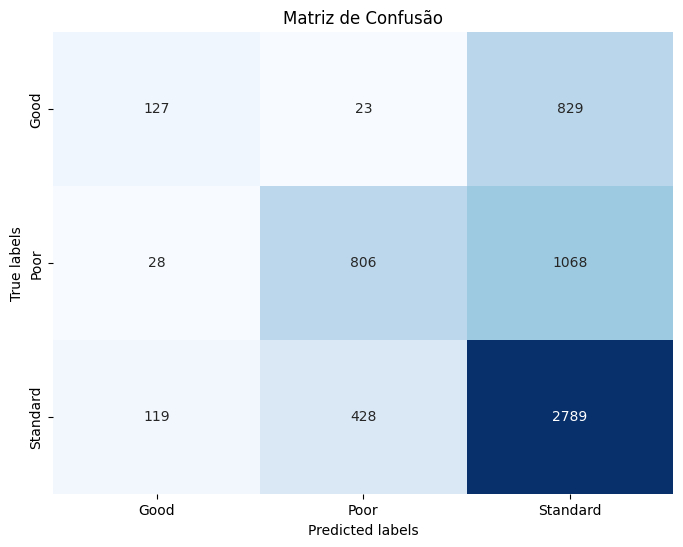

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Good', 'Poor', 'Standard'],
            yticklabels=['Good', 'Poor', 'Standard'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusão')
plt.show()

### Teste do modelo - Seleção das 10 melhores variáveis <a name="selecao"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Combinar os conjuntos de treinamento e teste
X_combined = pd.concat([X_train, X_test], axis=0)
y_combined = pd.concat([y_train, y_test], axis=0)

# Selecionar as melhores características usando o teste F de ANOVA
selector = SelectKBest(score_func=f_classif, k=10)
X_combined_selected = selector.fit_transform(X_combined, y_combined)

# Obter os índices das características selecionadas
selected_features_indices = selector.get_support(indices=True)

# Obter os nomes das características selecionadas
selected_features_names = X_combined.columns[selected_features_indices]

# Manter apenas as características selecionadas nos conjuntos de treinamento e teste
X_train_selected = X_train[selected_features_names]
X_test_selected = X_test[selected_features_names]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [72]:
X_train_selected

,Age,Monthly_Inhand_Salary,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_Low_spent_Small_value_payments
0,0.014037,-1.006746,0.047863,2.818369,1.534439,-0.719341,-0.419466,0,0,1
1,-0.266707,-0.881127,-0.937571,-0.034563,-1.129167,-0.783868,-0.273569,1,0,0
2,-0.547450,2.267285,-0.280615,1.069372,-1.220257,1.413595,2.468718,0,1,0
3,1.604918,-0.776723,-0.937571,-0.330705,-0.578248,-0.321633,-0.531219,0,1,0
4,-1.108938,1.150341,-0.477702,-1.305627,-0.753334,3.361941,-1.513006,1,0,0
...,...,...,...,...,...,...,...,...,...,...
24862,-0.921775,-0.204299,-0.346311,1.154403,2.232325,-0.260170,-0.822530,0,0,0
24863,1.604918,-0.822583,-1.266049,-1.273374,-0.644554,-0.540996,-0.494551,1,0,0
24864,0.949849,-0.874471,1.098992,-1.249917,0.879845,-0.641366,-0.685642,0,0,0
24865,0.856268,-0.382038,-0.280615,0.409650,-0.209751,0.380589,-0.546532,0,1,1


É possível ver o novo dataframe apenas com as 10 colunas que explicam melhor a variável alvo

In [73]:
#Realizando o treinamento apenas com as 10 colunas selecionadas

# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo com as características selecionadas
model.fit(X_train_selected, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_selected)

# Calcular a acurácia do modelo nos dados de teste
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo nos dados de teste:", accuracy)

Acurácia do modelo nos dados de teste: 0.6340678783979411


### Matriz de confusão - Seleção das 10 melhores variáveis <a name="matriz_selecao"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

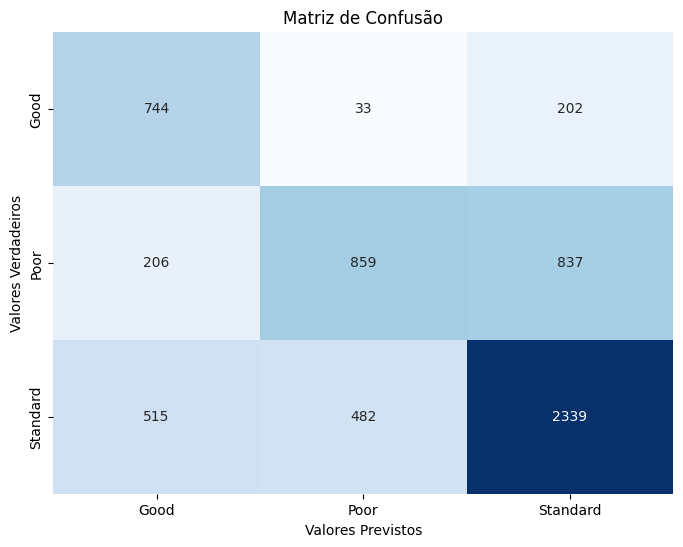

In [74]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Good', 'Poor', 'Standard'],
            yticklabels=['Good', 'Poor', 'Standard'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.show()

Entre o modelo utilizando o PCA e o de seleção das 10 mehlores variáveis, o de seleção teve uma melhor taxa de acerto.
Portanto, irei prosseguir com o "tunning" de hiperparametros para ele.

### Tunning do modelo <a name="tunning"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [75]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros a serem testados
parameters = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 1, 10, 100]}

# Criar o modelo de regressão logística
model = LogisticRegression(max_iter=1000)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=5, scoring='accuracy')

# Treinar o modelo usando Grid Search
grid_search.fit(X_train_selected, y_train)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Melhor pontuação de validação cruzada
best_score = grid_search.best_score_
print("Melhor pontuação de validação cruzada:", best_score)

# Avaliar o modelo com os melhores hiperparâmetros no conjunto de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo nos dados de teste:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Melhores hiperparâmetros: {'C': 100, 'penalty': 'l2'}
Melhor pontuação de validação cruzada: 0.6237985402637856
Acurácia do modelo nos dados de teste: 0.6342287276821618


### Matriz de confusão - Após tunning <a name="matriz_tunning"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

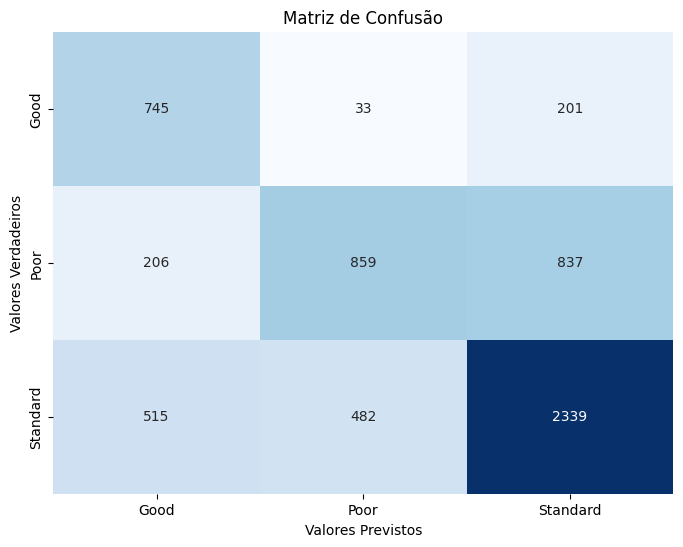

In [76]:
# Fazer previsões usando o modelo ajustado
y_pred = best_model.predict(X_test_selected)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Good', 'Poor', 'Standard'],
            yticklabels=['Good', 'Poor', 'Standard'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.show()

Após o tunning, a taxa de acerto do modelo ficou ligeiramente melhor, foi 63,406% para 63,422%.

## Avaliação de resultados <a name="avaliacao"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

- O modelo alcançou uma taxa de acerto um pouco superior a 63,4%, o que é considerado razoável, especialmente considerando que temos três classificações distintas para nossa variável resposta.

- Uma observação positiva é que o modelo classificou apenas 33 clientes como "Poor" quando, na verdade, eram "Good". Essa precisão é encorajadora, pois é importante minimizar os falsos negativos.

- Os erros e acertos foram distribuídos de forma equilibrada, indicando que o modelo pode ter menos viés.

- A matriz de confusão revela que os valores da diagonal principal (valores corretamente classificados) são consistentemente maiores do que os outros valores na mesma coluna, sugerindo um bom desempenho na classificação.

- No entanto, houve um ganho marginal na taxa de acerto após o ajuste do modelo. Isso sugere que o ajuste de parâmetros poderia ter sido mais eficaz, e outras metodologias podem ser exploradas para melhorar ainda mais o desempenho.

- Além disso, seria benéfico explorar outras técnicas de seleção de variáveis para aprimorar a precisão do modelo.



---

## Etapa 6 Crisp-DM: Implantação <a name="implantacao"></a>

Na célula abaixo o modelo foi salvo no formato "pickel", assim ele pode ser reaproveitado em outros projetos ou ser utilizado para o deploy.

Criar um aplicativo web com o streamlit seria uma ótima opção de deploy, como esse é apenas um projeto simplificado e teórico, optei por não fazer o aplicativo dele nesse momento. Caso queira, visite meu [Github](https://github.com/IgorCBzxc), lá é possível ver alguns projetos com deploy utilizando o streamlit.

Muito obrigado a todos pela atenção! Qualquer dúvida ou sugestão, pode me contactar pelo meu [Linkedin](https://www.linkedin.com/in/igor-coelho-barbosa/).

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [77]:
import pickle

# Salvar o modelo treinado
with open('modelo_log_reg.pkl', 'wb') as f:
    pickle.dump(best_model, f)

---